# Statistical NLP : Blog Authorship Corpus_Statistical NLP_R8_Project1

## Blog Authorship Corpus

- **Project Name : Blog Authorship Corpus**

##### **Project Description**
- Classification is probably the most popular task that you would deal with in real life.
Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the
information about the writer without knowing about him/her.
- We are going to create a classifier that predicts multiple features of the author of a given text.
- We have designed it as a Multilabel classification problem.

##### **Dataset**
- Over 600,000 posts from more than 19 thousand bloggers
- The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from
blogger.com in August 2004. The corpus incorporates a total of __681,288 posts and over 140 million
words - or approximately 35 posts and 7250 words per person.__
- Each blog is presented as a separate file, the name of which indicates a blogger id# and the
blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and
age but for many, industry and/or sign is marked as unknown.)
- All bloggers included in the corpus fall into one of three age groups:
    - 8240 "10s" blogs (ages 13-17)
    - 8086 "20s" blogs(ages 23-27)
    - 2994 "30s" blogs (ages 33-47)
- For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting
has been stripped with two exceptions. Individual posts within a single blogger are separated by the
date of the following post and links within a post are denoted by the label urllink.
- Link to Dataset  https://www.kaggle.com/rtatman/blog-authorship-corpus

In [0]:
import pandas as pd
import numpy as np
import re
import gc
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 100)

In [142]:
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk import punkt
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import multilabel_confusion_matrix,classification_report
# for balancing the classes in the dataset
from sklearn.utils import resample

In [144]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [145]:
!ls '/gdrive/My Drive/AIML/Statistical_NLP_R8_Project 1'

 blogtext.csv
'Statistical NLP-Project-1_R8.ipynb'
'Statistical NLP-Project-1_R8_V0.ipynb'
'Statistical NLP-Project-1_R8_V1.ipynb'
'Statistical NLP-Project-1_R8_V2_12pc.ipynb'
'Statistical NLP-Project-1_R8_V3.ipynb'


### 1. Load the dataset (5 points)

#### a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [0]:
#read the dataset and load it to pandas dataframe

#data = pd.read_csv("blogtext.csv")
data = pd.read_csv("/gdrive/My Drive/AIML/Statistical_NLP_R8_Project 1/blogtext.csv")

In [147]:
#shape of dataset

data.shape

(681284, 7)

In [148]:
#dtypes of dataset columns

data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [149]:
#Columns in dataset

data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [150]:
#first two rows with head()

data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait unti..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie ...


In [151]:
#last five rows with tail()

data.tail()

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really bitter diatribe about you and your disease spreadi..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast infection in past two months straight on the heels ..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fucking BALD! Good luck with that..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am asking you to leave my house, Why? because you shit ..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might already know me. My name's Weird Al Yankovic. I hav..."


In [152]:
#Check Null values

data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [153]:
#Check duplicates in Text column

data['text'].duplicated().sum()

69632

In [0]:
#Drop duplicates in Text column

data.drop_duplicates(subset='text', keep='first', inplace = True)

In [155]:
#shape of dataset after removing duplicates

data.shape

(611652, 7)

In [156]:
data['text'].str.len().sort_values(ascending=False).head()

529872    790123
302666    620448
658665    411850
31751     321278
384759    295127
Name: text, dtype: int64

In [157]:
#5-point summary of length of blogs in text column

data['text'].str.len().describe()

count    611652.000000
mean       1163.233872
std        2419.298950
min           4.000000
25%         250.000000
50%         676.000000
75%        1459.000000
max      790123.000000
Name: text, dtype: float64

#### Observtions:
- There are 611652 blogs in the dataset
- smallest blog is of length 4 and largest blog is of length 790123
- average length of blog is 163

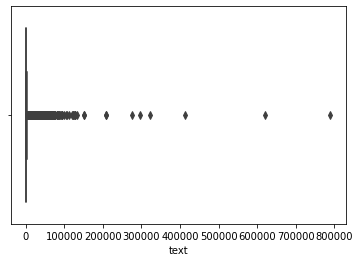

In [158]:
# Boxplot of length of blogs in text column

sns.boxplot(data['text'].str.len())
plt.show()

#### Observations:
- Boxplot shows that there are some outliers in the blogs.blogs which are very long and away from the mean can be removed

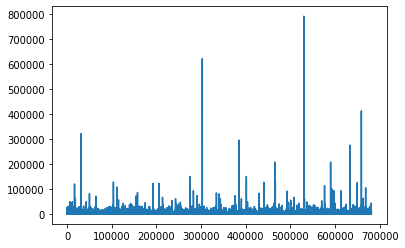

In [159]:
#plot of blogs of all lengths
plt.plot(data['text'].str.len())
plt.show()

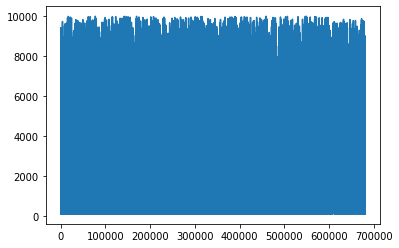

In [160]:
#plot of blogs which have consistent length
plt.plot(data.loc[(data['text'].str.len() <= 10000) & (data['text'].str.len() >= 100)]['text'].str.len())
plt.show()

In [161]:
print("No of Blogs with length less than or equal to 10000 :",(data['text'].str.len() <= 10000).sum())
print("No of Blogs with length greater than 10000 :",(data['text'].str.len() >10000).sum())
print("No of Blogs with length greater than or equal to 100 :",(data['text'].str.len() >= 100).sum())
print("No of Blogs with length less than 100 :",(data['text'].str.len() <100).sum())

No of Blogs with length less than or equal to 10000 : 609183
No of Blogs with length greater than 10000 : 2469
No of Blogs with length greater than or equal to 100 : 549783
No of Blogs with length less than 100 : 61869


In [162]:
((data['text'].str.len() <= 10000) & (data['text'].str.len() >= 100)).sum()

547314

#### Observations:
- The plot of length of texts show that there are blogs which are very long.
- To overcome memory errors we can consider only a small subset of the corpus.
- Here we are taking 50000 blogs as our dataset

#### Resampling the dataset based on each topic
 - Find value_counts of each topic in the datset
 - Consider topics which have more than 2000 blogs. These are 30 in number
 - Resample from these 30 topics and take equal count of blogs from each to get a datset size of 50000

In [163]:
#Count of blogs in each topic

data['topic'].value_counts()

indUnk                     230835
Student                    136051
Technology                  34430
Education                   28477
Arts                        26387
Communications-Media        19037
Internet                    15545
Non-Profit                  13029
Engineering                 10573
Law                          8701
Publishing                   7248
Science                      6500
Government                   6139
Consulting                   5339
Fashion                      4545
Marketing                    4508
Religion                     4503
Advertising                  4446
BusinessServices             4251
Accounting                   3672
Telecommunications           3670
Military                     2995
Banking                      2893
Sports-Recreation            2747
Chemicals                    2455
HumanResources               2354
RealEstate                   2327
Transportation               2143
Manufacturing                2008
Museums-Librar

In [164]:
#Number of topics in the total dataset

len(data['topic'].unique())

40

In [165]:
#list of topics

topics = data['topic'].unique()
topics

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

In [166]:
#list of topics which have count of blogs greater than 2000

topics = ['Student', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Accounting', 'Technology', 'Law',
       'Consulting', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Advertising', 'Museums-Libraries',
       'RealEstate', 'Manufacturing', 'Chemicals']
len(topics)

30

In [0]:
#Resample the data with replacement and sample size of each topic as 1670

blog = pd.DataFrame()
for topic in topics :
  #print(topic)
  df = pd.DataFrame()
  df = data[data['topic'] == topic].astype(str)
  df = resample(df, 
                replace=True,    # sample without replacement
                n_samples=1670,  # to match number of values in each class
                random_state=42) # reproducible results
  blog = pd.concat([blog, df])
  #break


In [168]:
blog.shape

(50100, 7)

In [169]:
blog.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [170]:
blog['topic'].value_counts()

Education               1670
Sports-Recreation       1670
Fashion                 1670
Banking                 1670
Government              1670
Telecommunications      1670
Technology              1670
RealEstate              1670
Accounting              1670
Science                 1670
Manufacturing           1670
Military                1670
Publishing              1670
Transportation          1670
Student                 1670
HumanResources          1670
Law                     1670
Chemicals               1670
Engineering             1670
Religion                1670
Internet                1670
Non-Profit              1670
indUnk                  1670
Consulting              1670
Communications-Media    1670
Museums-Libraries       1670
BusinessServices        1670
Advertising             1670
Arts                    1670
Marketing               1670
Name: topic, dtype: int64

In [0]:
#blog = data.iloc[0:50000]
blog = blog.drop(['id', 'date'], axis=1)
#blog = blog.dropna()

In [172]:
blog.shape

(50100, 5)

In [173]:
blog.columns

Index(['gender', 'age', 'topic', 'sign', 'text'], dtype='object')

### 2. Preprocess rows of the “text” column (7.5 points)

In [174]:
blog['text'][0:6]

614038            urlLink     Even when you're asleep, you're beautiful... I wish I could say the same abo...
659571                  8/3/04 Untitled....   No title for today, I couldn't think of one, nor was my day ...
524255              In a world of full of american idols and pop icons it becomes increasingly difficult t...
595054           After some months of unfettered freedom from the real word, I started working again today...
546560               So, my parents are watching the news and theres a baby in a locked car, dead. Now com...
285066                                                               urlLink    Alaska. &nbsp; urlLink       
Name: text, dtype: object

#### a. Remove unwanted characters
#### b. Convert text to lowercase
#### c. Remove unwanted spaces
#### d. Remove stopwords
#### e. Stem the text
#### f. Lemmatize the text

In [0]:
def preprocess_text(blog_text):
    blog_text=str(blog_text)

    #Convert text to lowercase
    blog_text=blog_text.lower()

    #Remove unwanted characters
    clean=re.compile('<.*?>')
    blog_text_clean=re.sub(clean,'',blog_text)

    #Remove digits
    rem_digits=re.sub('[0-9]+','',blog_text_clean)

    #Remove unwanted spaces by tokenizing on alphabet characters.
    #This step will tokenize the text based on word boundaries and will remove unwanted spaces also
    tokenizer=RegexpTokenizer(r'\w+')
    tokens=tokenizer.tokenize(rem_digits)

    #Remove stop words
    filtered_words=[w for w in tokens if len(w)>2 if not w in stopwords.words('english')]

    #Stem the text
    stemmed_words=[stemmer.stem(w) for w in filtered_words]

    #Lemmatize the text
    lemmatized_words=[lemmatizer.lemmatize(w) for w in stemmed_words]

    return " ".join(lemmatized_words)

In [0]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
blog['text_clean']=blog['text'].map(lambda s:preprocess_text(s))

In [177]:
blog['text_clean'][0:10]

614038                                                              urllink even asleep beauti wish could say
659571    untitl titl today think one day even excit enough think one anoth one thinkin day basic sit hous...
524255    world full american idol pop icon becom increasingli difficult critic individu prais accept conf...
595054    month unfett freedom real word start work today part time three day week work compani produc cus...
546560    parent watch news there babi lock car dead come countless year hear leav child unattend car crap...
285066                                                                            urllink alaska nbsp urllink
449554    urllink defenselink news iraqi offici american press report good even iraqi recogn bia see bad a...
562175    funni quoth mandi anyon interest contact somehow contact interest heh well still well partay ing...
634240                                                                               run cover goe back shell
74670     

### 3. Merge all the label columns together, for a particular sentence (7.5 points)

- As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence

In [178]:
blog.columns

Index(['gender', 'age', 'topic', 'sign', 'text', 'text_clean'], dtype='object')

In [179]:
blog.head(2)

,gender,age,topic,sign,text,text_clean
614038,male,17,Student,Gemini,"urlLink Even when you're asleep, you're beautiful... I wish I could say the same abo...",urllink even asleep beauti wish could say
659571,male,15,Student,Libra,"8/3/04 Untitled.... No title for today, I couldn't think of one, nor was my day ...",untitl titl today think one day even excit enough think one anoth one thinkin day basic sit hous...


#### a. Label columns to merge: “gender”, “age”, “topic”, “sign”

In [0]:
#Merge all four labels into one label

blog['labels'] = blog.apply(lambda x : [x['gender'], str(x['age']), x['topic'], x['sign']], axis=1)

In [181]:
blog[['text_clean','labels']][0:2]

,text_clean,labels
614038,urllink even asleep beauti wish could say,"[male, 17, Student, Gemini]"
659571,untitl titl today think one day even excit enough think one anoth one thinkin day basic sit hous...,"[male, 15, Student, Libra]"


#### b. After completing the previous step, there should be only two columns in your dataframe i.e. “text” and “labels”

In [0]:
#Create a DataFrame with two columns text and length

blog_df = pd.DataFrame()
blog_df['text'] = blog['text_clean']
blog_df['labels'] = blog['labels']

In [183]:
blog_df.shape

(50100, 2)

In [184]:
blog_df.columns

Index(['text', 'labels'], dtype='object')

In [185]:
blog_df.head()

,text,labels
614038,urllink even asleep beauti wish could say,"[male, 17, Student, Gemini]"
659571,untitl titl today think one day even excit enough think one anoth one thinkin day basic sit hous...,"[male, 15, Student, Libra]"
524255,world full american idol pop icon becom increasingli difficult critic individu prais accept conf...,"[female, 16, Student, Capricorn]"
595054,month unfett freedom real word start work today part time three day week work compani produc cus...,"[male, 27, Student, Virgo]"
546560,parent watch news there babi lock car dead come countless year hear leav child unattend car crap...,"[male, 16, Student, Gemini]"


### 4. Separate features and labels, and split the data into training and testing (5 points)

In [0]:
#Features
X = blog_df['text']

#labels
y = blog_df['labels']

In [0]:
#Split Features and labels into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [188]:
#Shape of X_train and y_train

X_train.shape, y_train.shape

((35070,), (35070,))

In [189]:
#Shape of X_test and y_test

X_test.shape, y_test.shape

((15030,), (15030,))

### 5. Vectorize the features (5 points)

#### a. Create a Bag of Words using count vectorizer
#### i. Use ngram_range=(1, 2)
#### ii. Vectorize training and testing features

###### Bag of Words using Count Vectorizer method

In [0]:
#Create an instance of CountVectorizer

countvect = CountVectorizer(ngram_range=(1,2), max_features=8000)

In [191]:
#Fit the CountVectorizer on Feature set

countvect.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=8000, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
#Transform training set and test set into count vectors (BoW)

X_bow_train = countvect.transform(X_train)
X_bow_test = countvect.transform(X_test)

In [193]:
#Shape of sparse csr matrices with count vectors of training set and test set

X_bow_train.shape, X_bow_test.shape

((35070, 8000), (15030, 8000))

#### b. Print the term-document matrix

In [0]:
#Function to create term-document matrix by chunking the sparse csr matrix

def get_dtm_using_chunks(sparce_csr_matrix, size, chunk_size):
    #size=countvect.max_features
    #chunk_size=100
    dtm = pd.DataFrame()
    if size < chunk_size:
        dtm = pd.concat([dtm, pd.DataFrame(sparce_csr_matrix[:,0:size].toarray())], axis=1)
        gc.collect()
    chunks_nb = int(size/chunk_size)
    print("Max. Number of Features : ", size)
    print("Number of chunks used : ", chunks_nb)
    iter_ints = range(0, chunks_nb)
    print("Started creating DTM matrix by chunking....")
    for i in iter_ints:
        j = i * chunk_size
        if i+1 < chunks_nb:
            k = j + chunk_size
            #print("k loop",i,j,k,"\t")
            dtm = pd.concat([dtm, pd.DataFrame(sparce_csr_matrix[:,j:k].toarray())], axis=1)
            gc.collect()
        else:
            #print("j loop",i,j,"\t")
            dtm = pd.concat([dtm, pd.DataFrame(sparce_csr_matrix[:,j:].toarray())], axis=1)
            gc.collect()
    print("...Done")
    return dtm

In [195]:
print("Term-Document Matrix for Training-set count vector:")
dtm_train = get_dtm_using_chunks(X_bow_train, countvect.max_features, 100)

Term-Document Matrix for Training-set count vector:
Max. Number of Features :  8000
Number of chunks used :  80
Started creating DTM matrix by chunking....
...Done


In [196]:
print("Term-Document Matrix for Test-set count vector:")
dtm_test = get_dtm_using_chunks(X_bow_test, countvect.max_features, 100)

Term-Document Matrix for Test-set count vector:
Max. Number of Features :  8000
Number of chunks used :  80
Started creating DTM matrix by chunking....
...Done


##### Term-Document Matrix for training set

In [197]:
dtm_train.columns = countvect.get_feature_names()
dtm_train.shape

(35070, 8000)

In [198]:
dtm_train.columns

Index(['aaron', 'abandon', 'abbi', 'abbott', 'abc', 'abil', 'abit', 'abl',
       'abl find', 'abl get',
       ...
       'yummi', 'yun', 'yung', 'yup', 'zealand', 'zero', 'zip', 'zombi',
       'zone', 'zoo'],
      dtype='object', length=8000)

In [199]:
dtm_train.head()

,aaron,abandon,abbi,abbott,abc,abil,abit,abl,abl find,abl get,abl make,abl see,abort,abroad,absenc,absent,absolut,absolut noth,absorb,abstract,absurd,abt,abu,abu ghraib,abund,abus,academ,academi,accent,accept,access,accessori,accid,accident,accompani,accomplish,accord,accord urllink,account,accumul,...,year still,year think,year year,yearn,yeh,yell,yellow,yep,yesterday,yesterday went,yet,yet anoth,yet still,yike,yoga,york,york citi,york time,young,young man,young peopl,young woman,younger,youngest,your,youth,youth group,yr,yuck,yum,yummi,yun,yung,yup,zealand,zero,zip,zombi,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Term-Document Matrix for test set

In [200]:
dtm_test.columns = countvect.get_feature_names()
dtm_test.shape

(15030, 8000)

In [201]:
dtm_test.columns

Index(['aaron', 'abandon', 'abbi', 'abbott', 'abc', 'abil', 'abit', 'abl',
       'abl find', 'abl get',
       ...
       'yummi', 'yun', 'yung', 'yup', 'zealand', 'zero', 'zip', 'zombi',
       'zone', 'zoo'],
      dtype='object', length=8000)

In [202]:
dtm_test.head()

,aaron,abandon,abbi,abbott,abc,abil,abit,abl,abl find,abl get,abl make,abl see,abort,abroad,absenc,absent,absolut,absolut noth,absorb,abstract,absurd,abt,abu,abu ghraib,abund,abus,academ,academi,accent,accept,access,accessori,accid,accident,accompani,accomplish,accord,accord urllink,account,accumul,...,year still,year think,year year,yearn,yeh,yell,yellow,yep,yesterday,yesterday went,yet,yet anoth,yet still,yike,yoga,york,york citi,york time,young,young man,young peopl,young woman,younger,youngest,your,youth,youth group,yr,yuck,yum,yummi,yun,yung,yup,zealand,zero,zip,zombi,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 6. Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. (5 points)


In [203]:
y_train.head()

287357                  [female, 14, indUnk, Leo]
70618              [female, 17, indUnk, Aquarius]
359824    [female, 38, BusinessServices, Scorpio]
14508     [female, 25, Museums-Libraries, Gemini]
97790            [female, 24, Government, Taurus]
Name: labels, dtype: object

In [204]:
y_test.head()

39394                     [male, 25, Arts, Cancer]
526188              [male, 36, Non-Profit, Pisces]
15077     [male, 23, Communications-Media, Cancer]
527201              [male, 16, Chemicals, Scorpio]
506149                    [male, 27, Arts, Taurus]
Name: labels, dtype: object

In [205]:
(y_train.append(y_test)).shape

(50100,)

In [0]:
#Dictionary to find count of each label in the multiclass label 

from collections import defaultdict
label_counts = defaultdict(int)
for label in y_train.append(y_test):
    for item in label:
        label_counts[item]+= 1

In [207]:
for key in label_counts:
    print("{} : {}".format(key, label_counts.get(key)))

female : 22996
14 : 775
indUnk : 1670
Leo : 4062
17 : 3342
Aquarius : 4050
38 : 364
BusinessServices : 1670
Scorpio : 4330
25 : 6370
Museums-Libraries : 1670
Gemini : 4088
24 : 6425
Government : 1670
Taurus : 4653
23 : 6543
Advertising : 1670
Marketing : 1670
Capricorn : 3405
16 : 2139
Religion : 1670
Sagittarius : 4135
male : 27104
Non-Profit : 1670
Engineering : 1670
Virgo : 4495
36 : 2364
RealEstate : 1670
47 : 464
46 : 714
Accounting : 1670
34 : 1441
Military : 1670
Student : 1670
Arts : 1670
Chemicals : 1670
Cancer : 4485
27 : 4206
Manufacturing : 1670
Fashion : 1670
Libra : 3587
HumanResources : 1670
Communications-Media : 1670
26 : 5271
Education : 1670
33 : 1924
Pisces : 4024
Publishing : 1670
Law : 1670
43 : 428
Internet : 1670
Aries : 4786
Technology : 1670
39 : 629
Science : 1670
35 : 1700
37 : 991
Banking : 1670
Sports-Recreation : 1670
Telecommunications : 1670
Transportation : 1670
40 : 439
13 : 412
42 : 254
Consulting : 1670
15 : 1342
45 : 422
44 : 199
41 : 430
48 : 512


In [208]:
label_counts.keys()

dict_keys(['female', '14', 'indUnk', 'Leo', '17', 'Aquarius', '38', 'BusinessServices', 'Scorpio', '25', 'Museums-Libraries', 'Gemini', '24', 'Government', 'Taurus', '23', 'Advertising', 'Marketing', 'Capricorn', '16', 'Religion', 'Sagittarius', 'male', 'Non-Profit', 'Engineering', 'Virgo', '36', 'RealEstate', '47', '46', 'Accounting', '34', 'Military', 'Student', 'Arts', 'Chemicals', 'Cancer', '27', 'Manufacturing', 'Fashion', 'Libra', 'HumanResources', 'Communications-Media', '26', 'Education', '33', 'Pisces', 'Publishing', 'Law', '43', 'Internet', 'Aries', 'Technology', '39', 'Science', '35', '37', 'Banking', 'Sports-Recreation', 'Telecommunications', 'Transportation', '40', '13', '42', 'Consulting', '15', '45', '44', '41', '48'])

### 7. Transform the labels - (7.5 points)

- As we have noticed before, in this task each example can have multiple tags. To deal with
such kind of prediction, we need to transform labels in a binary form and the prediction will be
a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn

#### a. Convert your train and test labels using MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer(classes = sorted(label_counts.keys()))

In [0]:
y_train_mlb = mlb.fit_transform(y_train)

In [0]:
y_test_mlb = mlb.fit_transform(y_test)

In [212]:
mlb.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Aquarius',
       'Aries', 'Arts', 'Banking', 'BusinessServices', 'Cancer',
       'Capricorn', 'Chemicals', 'Communications-Media', 'Consulting',
       'Education', 'Engineering', 'Fashion', 'Gemini', 'Government',
       'HumanResources', 'Internet', 'Law', 'Leo', 'Libra',
       'Manufacturing', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype=object)

In [213]:
y_train_mlb[0:2]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0]])

In [214]:
y_test_mlb[0:2]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1]])

### 8. Choose a classifier - (5 points)

- In this task, we suggest using the One-vs-Rest approach, which is implemented in
OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a
basic classifier, use LogisticRegression . It is one of the simplest methods, but often it
performs good enough in text classification tasks. It might take some time because the
number of classifiers to train is large.

#### a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [0]:
logreg_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

#### b. One-vs-Rest approach 

In [0]:
OnevsRest_clf_bow = OneVsRestClassifier(estimator=logreg_clf)

### 9. Fit the classifier, make predictions and get the accuracy (5 points)

In [217]:
#Fit the Classifier on on count vectors for Training dataset

OnevsRest_clf_bow.fit(X_bow_train, y_train_mlb)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [218]:
#classifier's score for training data

OnevsRest_clf_bow.score(X_bow_train, y_train_mlb)

0.45072711719418307

In [219]:
#classifier's score for test data

OnevsRest_clf_bow.score(X_bow_test, y_test_mlb)

0.12568196939454424

In [220]:
#classes present in the multiclass classification

print("No of Classes in the dataset taken : ",OnevsRest_clf_bow.n_classes_)
print("Classes in  the dataset taken are:\n", OnevsRest_clf_bow.classes_)

No of Classes in the dataset taken :  70
Classes in  the dataset taken are:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


In [0]:
#Predicted values on count vectors for Test dataset

y_pred_bow = OnevsRest_clf_bow.predict(X_bow_test)

In [222]:
y_pred_bow

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

#### a. Print the following
- i. Accuracy score
- ii. F1 score
- iii. Average precision score
- iv. Average recall score
-  v. Tip: Make sure you are familiar with all of them. How would you expect the
things to work for the multi-label scenario? Read about micro/macro/weighted
averaging

- Three metrics are aavilable for evaluation in multiclass classification - macro, micro and weigted.Here, we are using weighted as the parameter

"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.

"weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

"micro" gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

In [223]:
#Multilabel Confusion Matrix

print(multilabel_confusion_matrix(y_test_mlb, y_pred_bow))

[[[14893    21]
  [  100    16]]

 [[14758    51]
  [  159    62]]

 [[14523   126]
  [  315    66]]

 [[14175   200]
  [  492   163]]

 [[13684   304]
  [  684   358]]

 [[12192   834]
  [ 1507   497]]

 [[12421   776]
  [ 1378   455]]

 [[12358   710]
  [ 1493   469]]

 [[12839   647]
  [ 1188   356]]

 [[13280   472]
  [  997   281]]

 [[14306   157]
  [  412   155]]

 [[14466   133]
  [  341    90]]

 [[14351   139]
  [  388   152]]

 [[14151   191]
  [  414   274]]

 [[14643    81]
  [  239    67]]

 [[14910    23]
  [   79    18]]

 [[14791    45]
  [  141    53]]

 [[14872    24]
  [  111    23]]

 [[14880    27]
  [  102    21]]

 [[14939    13]
  [   62    16]]

 [[14870    35]
  [   93    32]]

 [[14946    18]
  [   44    22]]

 [[14864    28]
  [  115    23]]

 [[14790    21]
  [   96   123]]

 [[14862    40]
  [   62    66]]

 [[14842    28]
  [   84    76]]

 [[14395   128]
  [  305   202]]

 [[14398   133]
  [  378   121]]

 [[13320   514]
  [  933   263]]

 [[13058   556

In [0]:
#Classification Report

report = classification_report(y_test_mlb, y_pred_bow, output_dict=True, zero_division=1)

In [0]:
#DataFrame to store Classification Report

cr_df = pd.DataFrame(report).transpose()

In [226]:
cr_df.head(10)

,precision,recall,f1-score,support
0,0.432432,0.137931,0.209150,116.0
1,0.548673,0.280543,0.371257,221.0
2,0.343750,0.173228,0.230366,381.0
3,0.449036,0.248855,0.320236,655.0
4,0.540785,0.343570,0.420188,1042.0
5,0.373403,0.248004,0.298051,2004.0
6,0.369618,0.248227,0.296997,1833.0
7,0.397795,0.239042,0.298631,1962.0
8,0.354935,0.230570,0.279545,1544.0
9,0.373174,0.219875,0.276711,1278.0


In [227]:
cr_df.tail(10)

,precision,recall,f1-score,support
64,0.472656,0.246436,0.323963,491.0
65,0.577904,0.434968,0.496350,469.0
66,0.388009,0.255019,0.307761,1345.0
67,0.677032,0.617567,0.645934,6945.0
68,0.065000,0.025591,0.036723,508.0
69,0.694537,0.746939,0.719785,8085.0
micro avg,0.513479,0.355472,0.420110,60120.0
macro avg,0.446151,0.263028,0.327159,60120.0
weighted avg,0.477907,0.355472,0.400140,60120.0
samples avg,0.550002,0.355472,0.397759,60120.0


In [228]:
#Accuracy score

print(accuracy_score(y_test_mlb, y_pred_bow))

0.12568196939454424


In [229]:
#F1 score

print(f1_score(y_test_mlb, y_pred_bow, average='weighted'))

0.4001403630936967


In [230]:
#Precision score

print(precision_score(y_test_mlb, y_pred_bow, average='weighted', zero_division=1))

0.4779071044311637


In [231]:
# Recall score

print(recall_score(y_test_mlb, y_pred_bow, average='weighted'))

0.3554723885562209


In [232]:
#Average Precision score

print(average_precision_score(y_test_mlb, y_pred_bow, average='weighted'))

0.2772191923196408


In [233]:
#Average Recall score
#support is the number of samples of the true positives that lie in that class.
#avearge of the recall for each calss for the suport for the class weighted by total support for all classes

sum((cr_df.iloc[0:80]['recall']) * (cr_df.iloc[0:80]['support']))/ sum(cr_df.iloc[0:80]['support'])

0.33698344053365553

In [234]:
#ROC-AUC score

print(roc_auc_score(y_test_mlb, y_pred_bow, average='weighted'))

0.6272038754006756


### 10. Print true label and predicted label for any five examples (7.5 points)

##### True labels for five examples

In [235]:
y_test_mlb

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [0]:
#Inverse Transform multiclass masked labels to true labels

y_test_labels = mlb.inverse_transform(y_test_mlb)

In [237]:
y_test_labels[0:5]

[('25', 'Arts', 'Cancer', 'male'),
 ('36', 'Non-Profit', 'Pisces', 'male'),
 ('23', 'Cancer', 'Communications-Media', 'male'),
 ('16', 'Chemicals', 'Scorpio', 'male'),
 ('27', 'Arts', 'Taurus', 'male')]

In [238]:
y_test[0:5]

39394                     [male, 25, Arts, Cancer]
526188              [male, 36, Non-Profit, Pisces]
15077     [male, 23, Communications-Media, Cancer]
527201              [male, 16, Chemicals, Scorpio]
506149                    [male, 27, Arts, Taurus]
Name: labels, dtype: object

##### Predicted labels for five examples

In [239]:
y_pred_bow

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [0]:
#Predicted Probabilities for test dataset

proba = OnevsRest_clf_bow.predict_proba(X_bow_test)

In [241]:
proba[0]

array([2.92136736e-15, 1.40976583e-16, 1.12716257e-07, 1.21589635e-07,
       6.26235002e-08, 1.98224755e-04, 2.35055029e-04, 5.64195094e-06,
       7.13047018e-02, 1.30417486e-04, 4.28358710e-05, 2.15947189e-12,
       5.41622118e-12, 4.11209872e-03, 2.35463006e-10, 2.26828453e-10,
       4.95744374e-11, 5.64602067e-12, 3.94668148e-07, 5.87658495e-15,
       1.80522335e-08, 4.31001854e-15, 8.42015746e-16, 5.50729593e-10,
       9.45539503e-10, 5.33154385e-11, 4.40084513e-08, 7.54410020e-01,
       3.65495087e-07, 1.04790843e-02, 1.90799527e-03, 2.73219544e-09,
       1.71646931e-07, 1.45055522e-06, 1.23014955e-07, 4.57315854e-09,
       4.96197714e-10, 1.60901735e-05, 7.20784714e-05, 3.25250568e-12,
       7.27792029e-06, 3.30436716e-02, 5.13106265e-07, 5.52034235e-13,
       2.02055557e-11, 2.58305878e-10, 2.86751069e-01, 7.51970040e-01,
       8.69307428e-12, 2.32536223e-08, 6.22887570e-06, 1.50150557e-07,
       6.06062063e-07, 4.75292120e-06, 8.12520927e-07, 7.23571056e-09,
      

In [0]:
#Inverse Transform multiclass probabilities to predicted labels usingig the probabilities above 0.5 threshold

bitarray = OnevsRest_clf_bow.label_binarizer_.inverse_transform(proba, threshold=0.5)
classnames = mlb.inverse_transform(bitarray)

In [243]:
classnames[0:6]

[('Advertising', 'Libra', 'male'),
 ('24', 'Marketing', 'female'),
 ('female',),
 ('male',),
 ('27', 'Arts', 'Taurus', 'male'),
 ('male',)]

In [0]:
#Inverse Transform multiclass masked labels to predicted labels

y_pred_labels = mlb.inverse_transform(y_pred_bow)

In [245]:
y_pred_labels[0:6]

[('Advertising', 'Libra', 'male'),
 ('24', 'Marketing', 'female'),
 ('female',),
 ('male',),
 ('27', 'Arts', 'Taurus', 'male'),
 ('male',)]

#### Observation:
 - __Train accuracy is 45% and Test accuracy is 12.5%__
 - We are not able to get good accuracy when we are applying Bag Of Words model using count vectorizer to extract features
 - When we are combining four different target columns having 70 classes, the classifier is not able to predict the classes accurately
 - One reason for the mis-classification could be, age being one of the multilabels which has discrete values and not categorical
 - If we consider only of the features like gender or topic as a target for classification, we could see good accuracy
 - Combining only gender and topic or sign and topic for multiclass classification could better the results.
 - If the number of classes are less the prediction will be good and we can get better results
